In [204]:
import pandas as pd
import numpy as np

In [205]:
df=pd.read_csv('Base_limpia.csv',encoding="iso-8859-1",dtype={'CustomerID':str}).drop('Unnamed: 0',axis=1)
print(df.shape)
df.head()

(399169, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [206]:
df['Semana']= pd.to_datetime(df.InvoiceDate).dt.date.map(lambda x:x.strftime('%U')).astype(int)
df['Ano']=pd.to_datetime(df.InvoiceDate).dt.year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Semana,Ano
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,48,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,48,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010


In [207]:
df['w']=df.Ano.map(str) + df.Semana.map(lambda x: str(x) if x>=10 else '0{}'.format(x))
df['w']=df['w'].astype(int)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Semana,Ano,w
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,48,2010,201048
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,201048
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,48,2010,201048
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,201048
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,201048


In [208]:
df[df.Ano==2010].w.value_counts()

201049    10814
201050     8039
201048     5001
201051     2357
Name: w, dtype: int64

In [209]:
201101-201051

50

In [210]:
df['w']= df.w.map(lambda x:x+49 if str(x)[:4]=='2010' else x).map(lambda x:x-201097)

In [211]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Semana,Ano,w
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,48,2010,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,48,2010,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0
...,...,...,...,...,...,...,...,...,...,...,...
399164,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,49,2011,52
399165,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,49,2011,52
399166,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,49,2011,52
399167,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,49,2011,52


In [212]:
df['Importe']=df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Semana,Ano,w,Importe
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,48,2010,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,48,2010,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0,20.34


In [213]:
Ventas=df[['InvoiceNo','w','Importe','CustomerID']].groupby(['InvoiceNo','w','CustomerID']).sum().reset_index()
aux1=df[df.Importe>0][['InvoiceNo','w','Importe','CustomerID']].groupby(['w','InvoiceNo','CustomerID']).sum().reset_index()
aux2=df[df.Importe>0][['StockCode','w','Importe']].groupby(['w','StockCode']).count().reset_index()

In [214]:
{'x1':'No_ventas', 'x2':'Desviacion Estandar de las ventas', 'x3':'Tasa_devueltos', 'x4':'No_clientes_recurrentes', 'x5':'No_articulos_recurrentes'}

{'x1': 'No_ventas',
 'x2': 'Desviacion Estandar de las ventas',
 'x3': 'Tasa_devueltos',
 'x4': 'No_clientes_recurrentes',
 'x5': 'No_articulos_recurrentes'}

In [435]:
t = pd.DataFrame(range(53),columns=['w'])
for k in range(4):
    #hacia atras    
    t['x1_%d'%(k+1)]=t.w.map(lambda x:Ventas[(Ventas.Importe>0) & (Ventas.w<=x)&(Ventas.w>=x-k)].shape[0])
    t['x2_%d'%(k+1)]=t.w.map(lambda x:Ventas[(Ventas.w<=x)&(Ventas.w>=x-k)].Importe.std())
    t['x3_%d'%(k+1)]=t.w.map(lambda x:Ventas[(Ventas.Importe<0)&(Ventas.w<=x)&(Ventas.w>=x-k)].shape[0]/ Ventas[(Ventas.w<=x)&(Ventas.w>=x-k)].shape[0])
    t['x4_%d'%(k+1)]=t.w.map(lambda x:(aux1[(aux1.w<=x)&(aux1.w>=x-k)][['CustomerID','Importe']].groupby('CustomerID').count().Importe>1)
                    .astype(int).sum())
    t['x5_%d'%(k+1)]=t.w.map(lambda x:(aux2[(aux2.w<=x)&(aux2.w>=x-k)].Importe>1).astype(int).sum())
#Target
t['target']=t.w.map(lambda x:Ventas[(Ventas.w<=x+2)&(Ventas.w>=x+1)].Importe.sum())
t.head()

,w,x1_1,x2_1,x3_1,x4_1,x5_1,x1_2,x2_2,x3_2,x4_2,...,x2_3,x3_3,x4_3,x5_3,x1_4,x2_4,x3_4,x4_4,x5_4,target
0,0,312,483.680055,0.098266,33,894,312,483.680055,0.098266,33,...,483.680055,0.098266,33,894,312,483.680055,0.098266,33,894,360830.80
1,1,529,524.068853,0.148148,63,1340,841,509.732998,0.130300,119,...,509.732998,0.130300,119,2234,841,509.732998,0.130300,119,2234,211139.28
2,2,423,479.672688,0.220994,47,1238,952,503.739772,0.182131,170,...,499.069839,0.162914,238,3472,1264,499.069839,0.162914,238,3472,140190.34
3,3,124,714.150931,0.287356,18,461,547,545.397998,0.237099,77,...,535.553700,0.195815,194,3039,1388,525.199913,0.175772,262,3933,213627.82
4,4,175,714.960559,0.211712,11,817,299,716.633424,0.244949,38,...,591.573713,0.231097,111,2516,1251,565.495947,0.198077,241,3856,212880.81


In [436]:
x0=t[t.w==52].drop(['target','w'],axis=1)
t=t[(t.w>=3)&(t.w<=50)].reset_index(drop=True)
t.target=t.target.map(np.log)
t.head()

,w,x1_1,x2_1,x3_1,x4_1,x5_1,x1_2,x2_2,x3_2,x4_2,...,x2_3,x3_3,x4_3,x5_3,x1_4,x2_4,x3_4,x4_4,x5_4,target
0,3,124,714.150931,0.287356,18,461,547,545.397998,0.237099,77,...,535.553700,0.195815,194,3039,1388,525.199913,0.175772,262,3933,12.271991
1,4,175,714.960559,0.211712,11,817,299,716.633424,0.244949,38,...,591.573713,0.231097,111,2516,1251,565.495947,0.198077,241,3856,12.268488
2,5,252,1182.117524,0.179153,16,942,427,1011.856314,0.192817,47,...,947.935107,0.216216,75,2220,974,779.875155,0.218299,167,3458,12.170873
3,6,200,883.884416,0.200000,17,883,452,1057.958230,0.188510,49,...,972.249861,0.195122,79,2642,751,931.113994,0.211962,103,3103,12.233545
4,7,268,404.268216,0.195195,17,977,468,654.371106,0.197256,41,...,873.125736,0.191011,92,2802,895,843.928618,0.195144,129,3619,12.111337


In [217]:
t.describe(percentiles=[0.01,0.02,0.05,0.95,0.99]).T

,count,mean,std,min,1%,2%,5%,50%,95%,99%,max
w,48.0,26.500000,14.000000,3.000000,3.470000,3.940000,5.350000,26.500000,47.650000,49.530000,50.000000
x1_1,48.0,331.125000,113.490205,124.000000,147.500000,171.000000,179.200000,313.500000,577.000000,641.070000,650.000000
x2_1,48.0,775.196833,345.536743,341.857012,371.190278,400.523544,406.465024,704.504350,1412.831301,1813.673179,2053.179689
x3_1,48.0,0.162480,0.039390,0.088150,0.097257,0.106364,0.120328,0.156060,0.228321,0.286841,0.287356
x4_1,48.0,32.020833,14.028072,11.000000,11.000000,11.000000,16.000000,30.500000,61.200000,68.000000,68.000000
x5_1,48.0,1099.062500,276.823272,461.000000,556.880000,652.760000,718.550000,1028.000000,1616.250000,1694.020000,1710.000000
x1_2,48.0,657.916667,202.851359,299.000000,359.160000,419.320000,446.150000,593.500000,1052.900000,1275.360000,1281.000000
x2_2,48.0,799.341354,300.219119,375.573454,376.813836,378.054218,442.543932,711.802108,1354.461728,1725.051192,1761.595066
x3_2,48.0,0.162404,0.028679,0.114720,0.117833,0.120946,0.128883,0.156879,0.212850,0.241260,0.244949
x4_2,48.0,81.541667,32.520997,38.000000,39.410000,40.820000,46.350000,74.000000,139.650000,188.650000,191.000000


In [218]:
X=t[[x for x in t.columns if x not in ['w','target']]].copy()
Y=t[['target']].copy()

In [219]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
import numpy as np

In [220]:
sc=MinMaxScaler()
Xs=pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [234]:
Xt, Xv, yt, yv = train_test_split(Xs,Y,train_size=0.7)

In [235]:
modelo1=LinearRegression()
modelo2= PassiveAggressiveRegressor()
modelo3=SVR()
modelo4=MLPRegressor(solver='lbfgs')

In [237]:
modelo1.fit(Xt,yt)
print(mean_absolute_error(y_pred=modelo1.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo1.predict(Xv),y_true=yv))

0.11768833720962803
0.31469036373934905


In [238]:
param = dict(C=np.arange(0,30,0.1))
grid = GridSearchCV(param_grid=param,cv=3,estimator=modelo2,n_jobs=-1,
                    error_score='mean_absolute_error',verbose=True)
grid.fit(Xt,yt)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.9s finished
/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='mean_absolute_error',
             estimator=PassiveAggressiveRegressor(C=1.0, average=False,
                                                  early_stopping=False,
                                                  epsilon=0.1,
                                                  fit_intercept=True,
                                                  loss='epsilon_insensitive',
                                                  max_iter=1000,
                                                  n_iter_no_change=5,
                                                  random_state=None,
                                                  shuffle=True, tol=0.001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_gri...
       24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2,
       25.3, 25.

In [239]:
grid.best_score_, grid.best_params_

(-0.2082939717941985, {'C': 21.5})

In [240]:
modelo_pasivo=grid.best_estimator_.fit(Xt,yt)
print(mean_absolute_error(y_pred=modelo_pasivo.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo_pasivo.predict(Xv),y_true=yv))

0.22542813045058452
0.2197125149146641


/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [241]:
param2 = dict(C=np.arange(0,50,.1),kernel=['linear','poly', 'rbf'])
grid2 = GridSearchCV(param_grid=param2,cv=4,estimator=modelo3,n_jobs=-1,
                    verbose=True)
grid2.fit(Xt,yt)

Fitting 4 folds for each of 1500 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 2956 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:   37.7s finished
/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=4, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3...
       45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. , 46.1,
       46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47. , 47.1, 47.2,
       47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48. , 48.1, 48.2, 48.3,
       48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49. , 49.1, 49.2, 49.3, 49.4,
       49.5, 49.6, 49.7, 49.8, 49.9]),
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs

In [242]:
grid2.best_score_, grid2.best_params_

(0.13300247625867503, {'C': 0.4, 'kernel': 'rbf'})

In [244]:
modelo_SVR=grid2.best_estimator_.fit(Xt,yt)
print(mean_absolute_error(y_pred=modelo_SVR.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo_SVR.predict(Xv),y_true=yv))

0.13201098508132494
0.15183225563241104


/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [245]:
param3 = dict(hidden_layer_sizes = [(a,b,c,) for a in range(3,8) for b in range(3,8) for c in range(3,8)],
activation = ['identity', 'logistic', 'tanh', 'relu'],
learning_rate = ['constant', 'invscaling', 'adaptive'])
grid3 = GridSearchCV(param_grid=param3,cv=3,estimator=modelo4,n_jobs=-1,
                    verbose=True,error_score='mean_absolute_score')
grid3.fit(Xt,yt)

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.6min finished
/home/paco/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/paco/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS

GridSearchCV(cv=3, error_score='mean_absolute_score',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t...
                                                (3, 3, 6), (3, 3, 7), (3, 4, 3),
                                                (3, 4, 4), (3, 4, 5), (3, 4, 6),
                                                (3, 4, 7), (3, 5, 3), (3, 5, 4),
                                                (3, 5, 5), (3, 5, 6), (3, 5, 7),
    

In [246]:
grid3.best_score_, grid3.best_params_

(0.41880839624272154,
 {'activation': 'logistic',
  'hidden_layer_sizes': (3, 4, 4),
  'learning_rate': 'adaptive'})

In [405]:
modelo_MLPR=grid3.best_estimator_.fit(Xt,yt)
print(mean_absolute_error(y_pred=modelo_MLPR.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo_MLPR.predict(Xv),y_true=yv))

0.1297544228471083
0.14915185946977422


/home/paco/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [406]:
Y['y^1']=modelo_pasivo.predict(Xs)
Y['y^2']=modelo_SVR.predict(Xs)
Y['y^3']=modelo_MLPR.predict(Xs)

In [407]:
Y.sample(10)

,target,y^1,y^2,y^3
10,12.399613,12.802891,12.401449,12.377594
7,12.366037,12.494273,12.303098,12.377789
34,12.369790,12.619056,12.543519,12.399328
42,12.926822,12.884773,12.955175,13.045332
43,13.110075,12.839505,13.010053,13.045233
20,12.298085,12.376023,12.697643,12.931818
6,12.389367,12.614560,12.325879,12.378796
46,13.070174,13.075823,12.897137,13.045325
11,12.494661,12.572656,12.394576,12.377774
14,12.332482,12.534233,12.465399,12.392199


In [419]:
import seaborn as sns
import matplotlib.pyplot as plt

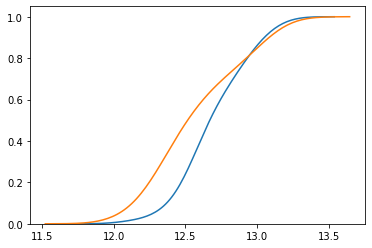

In [409]:
sns.distplot(Y[['y^1']],hist=False,kde_kws={'cumulative':True})
sns.distplot(Y[['target']],hist=False,kde_kws={'cumulative':True})

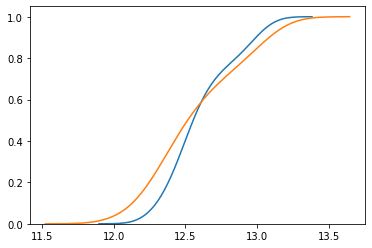

In [421]:
sns.distplot(Y[['y^2']],hist=False,kde_kws={'cumulative':True})
sns.distplot(Y[['target']],hist=False,kde_kws={'cumulative':True})


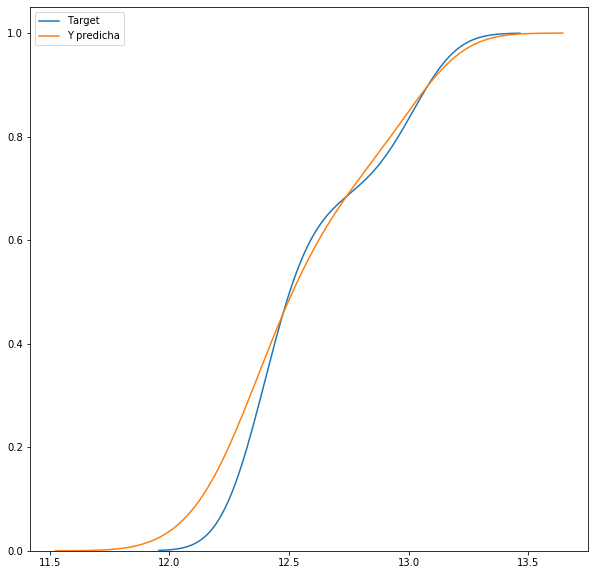

In [431]:
plt.figure(figsize=(10,10))
sns.distplot(Y[['y^3']],hist=False,kde_kws={'cumulative':True},label='Target')
sns.distplot(Y[['target']],hist=False,kde_kws={'cumulative':True},label='Y predicha')

plt.show()

In [415]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [416]:
sk = SelectKBest(f_regression,k=7) 
sk.fit(Xt,yt)
[a for a,b in zip(Xt.columns,sk.get_support()) if b]

/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['x5_1', 'x1_2', 'x5_2', 'x1_3', 'x5_3', 'x1_4', 'x5_4']

In [441]:
X0=pd.DataFrame(sc.fit_transform(x0),columns=x0.columns)
np.exp(modelo_MLPR.predict(X0))

array([238143.72994964])